# **R Regresión logística**

# **Resumen**

In [ ]:
library(ggplot2)

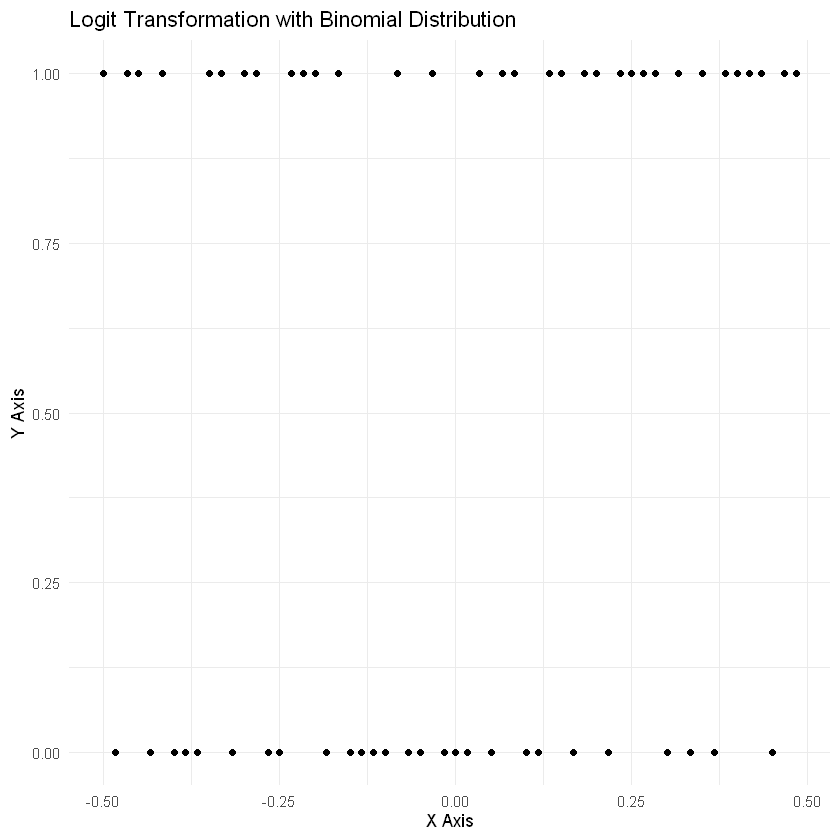

In [ ]:
x <- -30:29 / 60

y <- numeric(length(x))

logit <- function(x) {
  return(1 / (1 + exp(-x)))
}

for(i in seq_along(x)) {
  y[i] <- rbinom(n = 1, size = 1, prob = logit(x[i]))
}

# Combine x and y into a data frame for ggplot
data_frame <- data.frame(x=x, y=y)

# Create the plot using ggplot2.
ggplot(data=data_frame) +
  geom_point(aes(x=x, y=y)) +
  theme_minimal() + 
  labs(title="Logit Transformation with Binomial Distribution", x="X Axis", y="Y Axis")

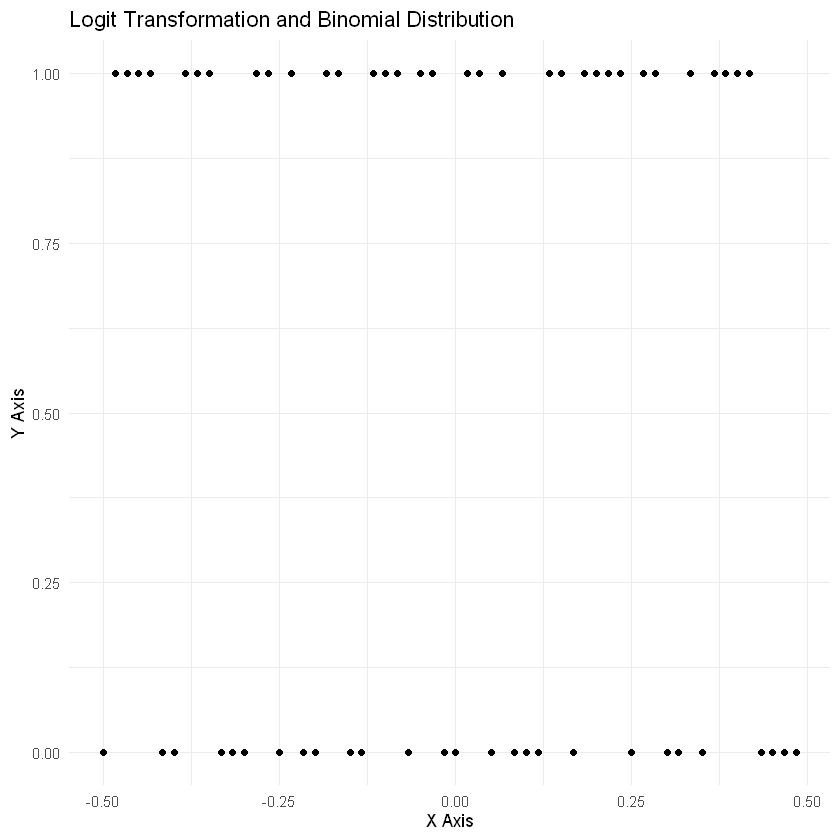

In [2]:
for(i in seq_along(x)) {
  y[i] <- rbinom(n = 1, size = 1, prob = logit(0.1 * x[i]))
}

# Create a data frame from the vectors
data_frame <- data.frame(x=x, y=y)

# Plotting with ggplot2 
ggplot(data=data_frame) +
  geom_point(aes(x=x, y=y)) + # Using aes for mapping aesthetics.
  theme_minimal() + # A minimalistic look to our plot. Optional styling can be applied here as per need
  labs(title="Logit Transformation and Binomial Distribution", x="X Axis", y="Y Axis") 

In [3]:
fit <- glm(y ~ x, family=binomial(link=logit))
summary(fit)


Call:
glm(formula = y ~ x, family = binomial(link = logit))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.1284     0.2714  -0.473   0.6361  
x             2.2149     0.9785   2.264   0.0236 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.911  on 59  degrees of freedom
Residual deviance: 77.320  on 58  degrees of freedom
AIC: 81.32

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula = 'y ~ x'


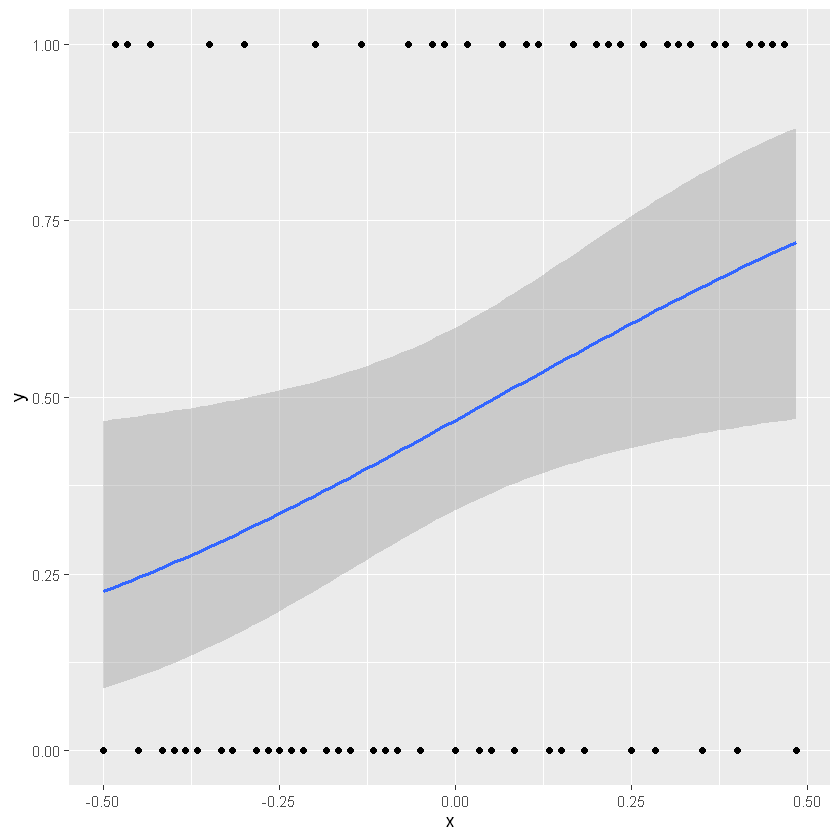

In [ ]:
df<-data.frame(x,y)
ggplot(df, aes(x=x, y=y)) + geom_point() +
  stat_smooth(method="glm", method.args = list(family=binomial), se=T)

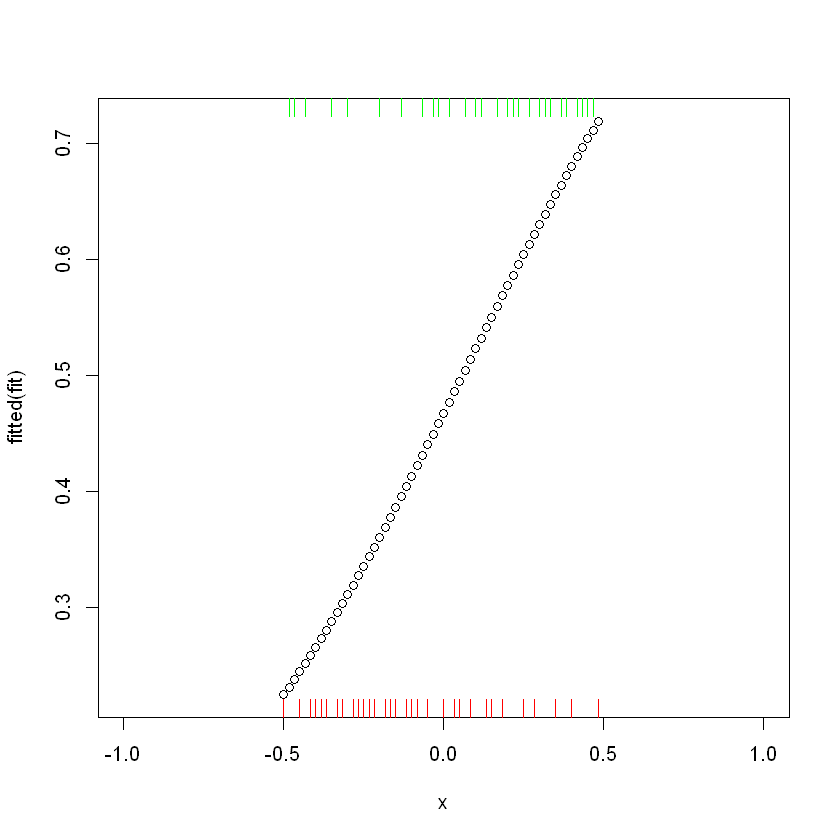

In [5]:
plot(x, fitted(fit),xlim=c(-1,1))

rug(x[y==0],col="red");rug(x[y==1],col="green",side=3)

# **Ejemplos más complejos**

**Generar datos**

In [6]:
x1<-(1:60)/60 -0.5; x2<-rnorm(60,0,1); x3<-rnorm(60,0,1);
y<-rep(0,60);
logit<-function(x){return(1/(1+exp(-x)))}

for (i in 1:60)
  y[i]<-rbinom(1,1,logit(10*x1[i]))


In [7]:
write.table(data.frame(x1=x1,x2=x2,x3=x3,y),file="datos")

**Ajustar unos modelos**

In [8]:
fit <- glm(y ~ x1+x2+x3, family=binomial(link=logit))
summary(fit)



Call:
glm(formula = y ~ x1 + x2 + x3, family = binomial(link = logit))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.7009     0.4725   1.484 0.137928    
x1           11.4574     2.9959   3.824 0.000131 ***
x2            1.0192     0.5088   2.003 0.045163 *  
x3            0.4510     0.4499   1.002 0.316154    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.577  on 59  degrees of freedom
Residual deviance: 36.039  on 56  degrees of freedom
AIC: 44.039

Number of Fisher Scoring iterations: 6


In [9]:

fit <- glm(y ~ x1, family=binomial(link=logit))
summary(fit)


Call:
glm(formula = y ~ x1, family = binomial(link = logit))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.3808     0.3978   0.957    0.338    
x1            8.8751     2.1386   4.150 3.32e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.577  on 59  degrees of freedom
Residual deviance: 42.291  on 58  degrees of freedom
AIC: 46.291

Number of Fisher Scoring iterations: 5


In [10]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


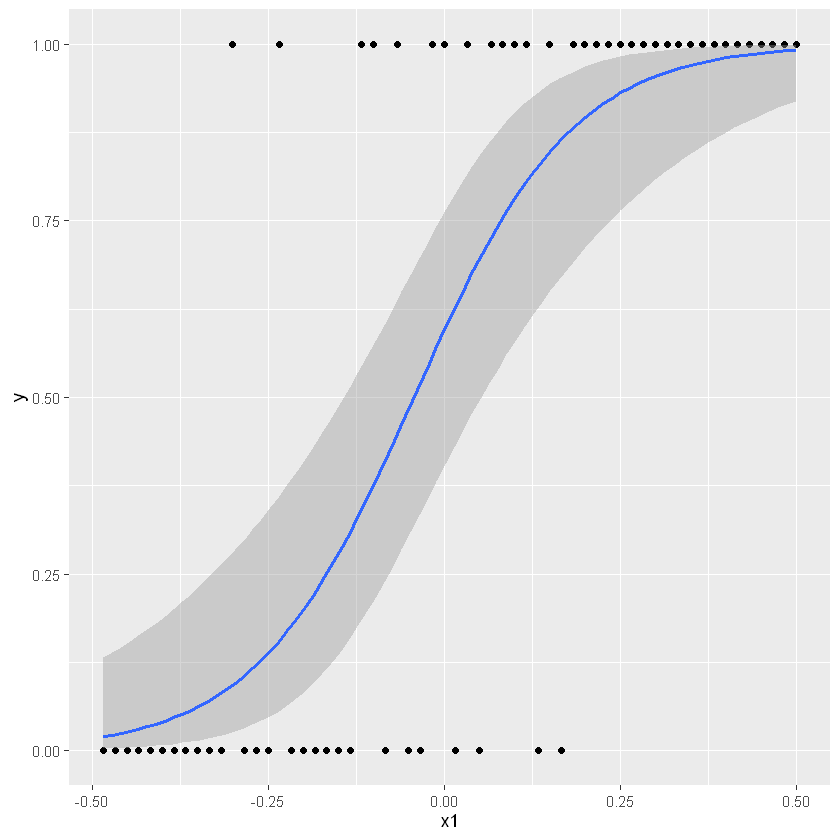

In [11]:
df<-data.frame(x1,y)
ggplot(df, aes(x=x1, y=y)) + geom_point() +
  stat_smooth(method="glm", method.args = list(family=binomial), se=T)


**Entender variabilidad de las estimaciones**

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


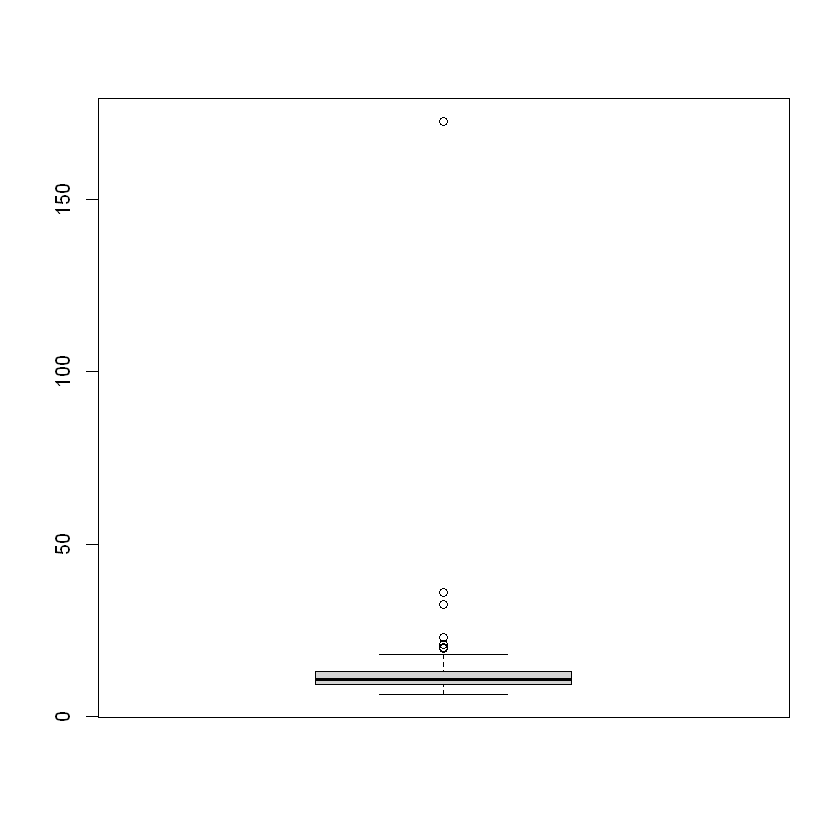

In [12]:
todos<-rep(NA,100)
x1<-(1:60)/60 -0.5; x2<-rnorm(60,0,1); x3<-rnorm(60,0,1);
for ( j in 1 :100)
{

y<-rep(0,60);
logit<-function(x){return(1/(1+exp(-x)))}

for (i in 1:60)
  y[i]<-rbinom(1,1,logit(10*x1[i]))

fit <- glm(y ~ x1+x2+x3, family=binomial(link=logit))

todos[j]<- fit$coefficients[2]
}


boxplot(todos)


In [13]:
fit$coefficients


(Intercept)          x1          x2          x3 
-0.31343290 13.93289283  0.09465793 -0.53375204

Más modelos

In [14]:
fit <- glm(y ~ x1+x2+x3+x1*x2+x1*x3+x2*x2+x1*x2*x3, family=binomial(link=logit))




summary(fit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = y ~ x1 + x2 + x3 + x1 * x2 + x1 * x3 + x2 * x2 + 
    x1 * x2 * x3, family = binomial(link = logit))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.3035     1.8125  -0.167    0.867
x1           56.3428    39.0733   1.442    0.149
x2           -0.5836     1.9307  -0.302    0.762
x3            0.4556     3.3946   0.134    0.893
x1:x2        30.5125    26.9220   1.133    0.257
x1:x3         8.9744    15.8062   0.568    0.570
x2:x3         2.6367     3.5808   0.736    0.462
x1:x2:x3     34.9666    24.2157   1.444    0.149

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.111  on 59  degrees of freedom
Residual deviance: 12.973  on 52  degrees of freedom
AIC: 28.973

Number of Fisher Scoring iterations: 11


**Visualizar y analizar poder predictivo**

con fitted(...) se obtiene las estimaciones para $P(Y=1|X=x)$

In [15]:
table(fitted(fit)>0.5,y)

       y
         0  1
  FALSE 29  1
  TRUE   2 28

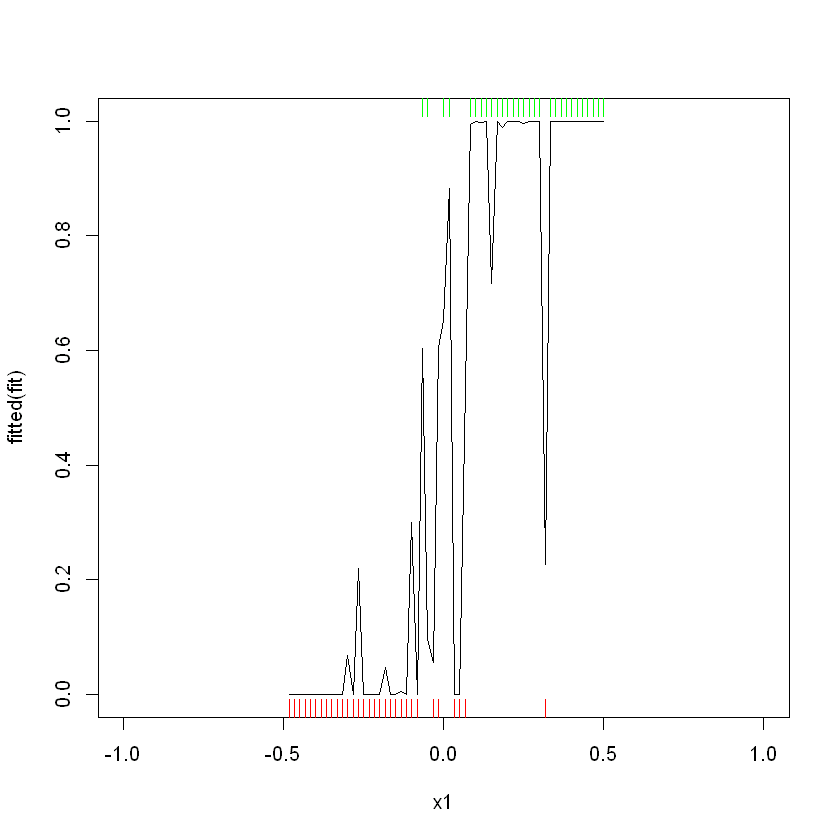

In [16]:
plot(x1, fitted(fit),type="l",xlim=c(-1,1))

rug(x1[y==0],col="red");rug(x1[y==1],col="green",side=3)

# **Aplicación: los datos del Titanic** (para clase de lunes)

In [17]:
library(Hmisc)


Adjuntando el paquete: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




In [18]:
load('./titanic3.sav')

In [19]:
attach(titanic3)

In [20]:
describe(titanic3)

titanic3 

 14  Variables      1309  Observations
--------------------------------------------------------------------------------
pclass 
       n  missing distinct 
    1309        0        3 
                            
Value        1st   2nd   3rd
Frequency    323   277   709
Proportion 0.247 0.212 0.542
--------------------------------------------------------------------------------
survived : Survived 
       n  missing distinct     Info      Sum     Mean 
    1309        0        2    0.708      500    0.382 

--------------------------------------------------------------------------------
name : Name 
       n  missing distinct 
    1309        0     1307 

lowest : Abbing, Mr. Anthony             Abbott, Master. Eugene Joseph   Abbott, Mr. Rossmore Edward     Abbott, Mrs. Stanton (Rosa Hunt Abelseth, Miss. Karen Marie    
highest: Zabour, Miss. Hileni            Zabour, Miss. Thamine           Zakarian, Mr. Mapriededer       Zakarian, Mr. Ortin             Zimmerman, Mr. Leo 

In [21]:
attach(titanic3)

 s<-summary(survived~age+sex+pclass+sibsp+parch,data=titanic3);

The following objects are masked from titanic3 (pos = 3):

    age, boat, body, cabin, embarked, fare, home.dest, name, parch,
    pclass, sex, sibsp, survived, ticket




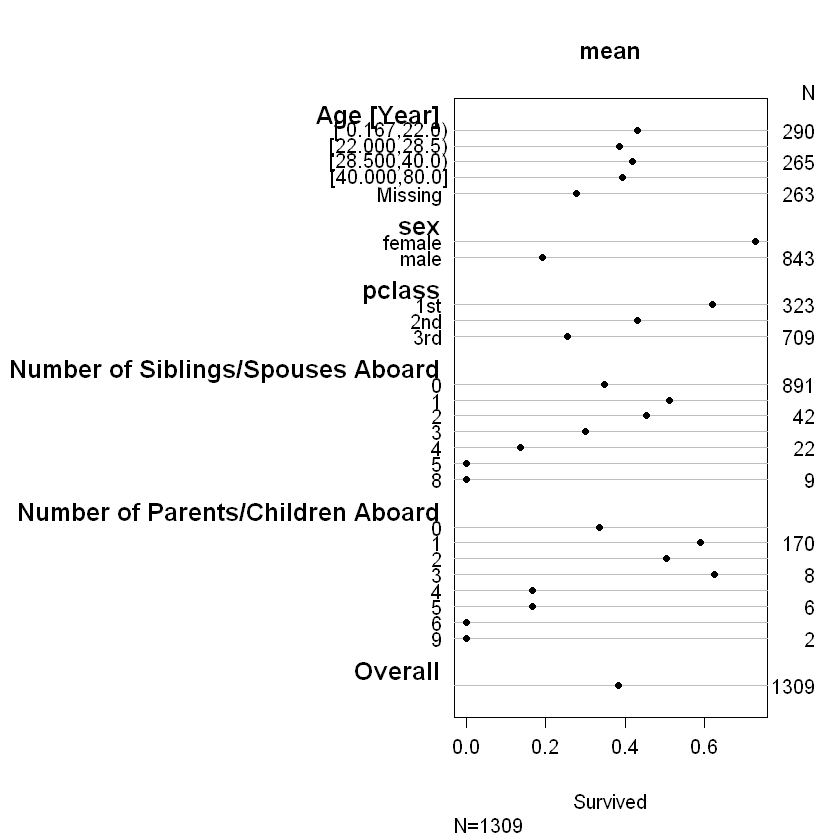

In [22]:
plot(s)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collaps

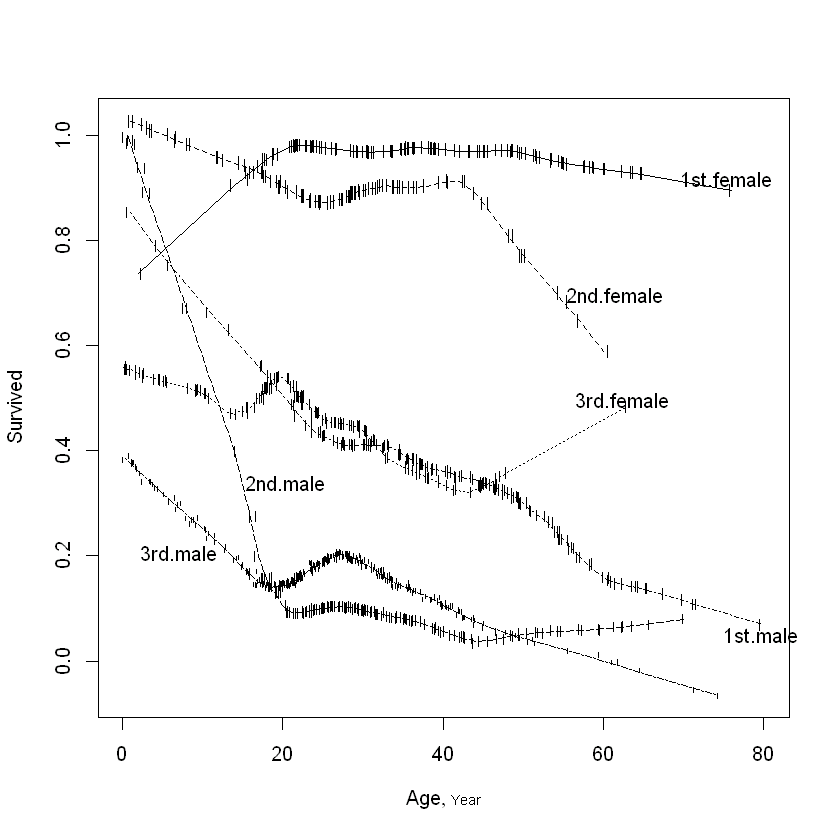

In [23]:
plsmo(age,survived,group=interaction(pclass,sex),datadensity=T)